## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, combining it on Mouse ID
mouse_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_data.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [36]:
# Checking the number of mice.
mouse_count = mouse_data.nunique()
mouse_count['Mouse ID']


249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_data[mouse_data.duplicated()]
duplicate_rows


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137     g989          0                45.0                 0     Propriva   

        Sex  Age_months  Weight (g)  
137  Female          21          26

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_data[mouse_data['Mouse ID'] == 'g989']
duplicate_mouse_data


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data[mouse_data['Mouse ID'] != 'g989']
clean_mouse_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [40]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_mouse_data['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Find the mean tumore volume
drug_df = clean_mouse_data.groupby(['Drug Regimen'])
drug_avg = drug_df.mean()
drug_avg = drug_avg.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_avg = drug_avg.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})

# Find the median tumor volume
drug_med = drug_df.median()
drug_med = drug_med.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_med = drug_med.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})

# Find the volume variance
drug_var = drug_df.var()
drug_var = drug_var.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_var = drug_var.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})

# Find volume std deviation
drug_std = drug_df.std()
drug_std = drug_std.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_std = drug_std.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'})

# Find volume std. err. 
drug_sem = drug_df.sem()
drug_sem = drug_sem.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_sem = drug_sem.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})

# Combine them all into one DataFrame
summ_table = pd.merge(drug_avg, drug_med, on='Drug Regimen')
summ_table = pd.merge(summ_table, drug_var, on='Drug Regimen')
summ_table = pd.merge(summ_table, drug_std, on='Drug Regimen')
summ_table = pd.merge(summ_table, drug_sem, on='Drug Regimen')

# Print the summary table
summ_table

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_summ_table = clean_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
# Using the aggregation method, produce the same summary statistics in a single line
clean_summ_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

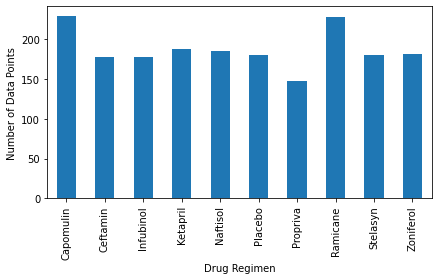

In [89]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug = drug_df.count()
mice_per_drug = mice_per_drug.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)','Mouse ID','Sex'], axis=1)
mice_per_drug.plot(kind='bar',legend=False)
plt.tight_layout()
plt.ylabel('Number of Data Points')
plt.show()


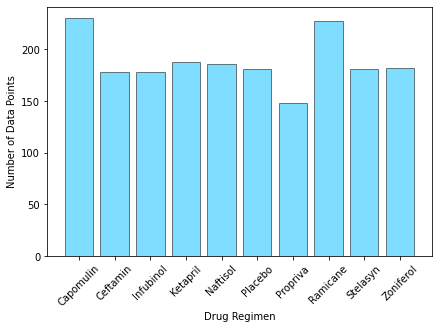

In [90]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_per_drug = mice_per_drug.reset_index()
plt.bar(mice_per_drug['Drug Regimen'], mice_per_drug['Tumor Volume (mm3)'], color = 'deepskyblue', alpha=0.5, edgecolor = 'black')
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

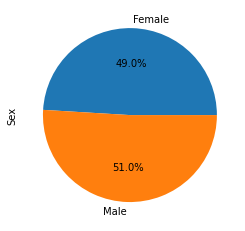

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mouse_data.groupby('Sex')
gender_group = gender_group.count()
gender_group = gender_group.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)','Mouse ID','Drug Regimen'], axis=1)
gender_group.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


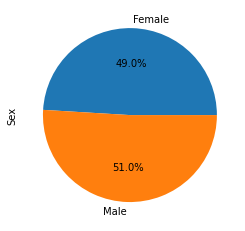

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = gender_group.reset_index()
plt.pie(gender_group['Tumor Volume (mm3)'], labels = gender_group['Sex'], autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
lim_reg = clean_mouse_data[(clean_mouse_data['Drug Regimen'] == 'Capomulin') | (clean_mouse_data['Drug Regimen'] == 'Ramicane') | (clean_mouse_data['Drug Regimen'] == 'Infubinol') | (clean_mouse_data['Drug Regimen'] == 'Ceftamin')]
lim_reg_tumor = lim_reg.groupby(['Drug Regimen', 'Mouse ID']).agg(Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
lim_reg_tumor
# Start by getting the last (greatest) timepoint for each mouse
lim_reg_df = lim_reg_tumor.reset_index()
lim_reg_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lim_reg_clean = lim_reg_tumor.stack(level=0).unstack(level=0)
lim_reg_clean

Drug Regimen              Capomulin  Ceftamin  Infubinol  Ramicane
Mouse ID                                                          
a203     Last_tumor_size        NaN       NaN     67.973       NaN
a251     Last_tumor_size        NaN       NaN     65.526       NaN
a275     Last_tumor_size        NaN    62.999        NaN       NaN
a411     Last_tumor_size        NaN       NaN        NaN    38.408
a444     Last_tumor_size        NaN       NaN        NaN    43.048
...                             ...       ...        ...       ...
y769     Last_tumor_size        NaN    68.595        NaN       NaN
y793     Last_tumor_size     31.896       NaN        NaN       NaN
y865     Last_tumor_size        NaN    64.730        NaN       NaN
z578     Last_tumor_size        NaN       NaN        NaN    30.639
z581     Last_tumor_size        NaN       NaN     62.754       NaN

[100 rows x 4 columns]

In [108]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    quartiles = lim_reg_clean[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(quartiles)
    # Locate the rows which contain mice on each drug and get the tumor volumes
#     if drug == 'Capomulin':
#         tumor_vol_cap.append(lim_reg_df['Tumor Volume (mm3)'])
#     elif drug == 'Ramicane':
#         tumor_vol_ram.append(lim_reg_df['Tumor Volume (mm3)'])
#     elif drug == 'Infubinol':
#         tumor_vol_inf.append(lim_reg_df['Tumor Volume (mm3)'])
#     elif drug == 'Ceftamin':
#         tumor_vol_ceft.append(lim_reg_df['Tumor Volume (mm3)'])

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
# # tumor_vol_cap = pd.DataFrame(tumor_vol_cap)
# # cap_quartiles = tumor_vol_cap.quantile([.25,.5,.75], axis=1)
# lowerq_cap = cap_quartiles[.25]
# upperq_cap = cap_quartiles[.75]
# iqr_cap = upperq_cap-lowerq_cap
# print(f"The lower quartile of temperatures is: {lowerq_cap}")
# print(f"The upper quartile of temperatures is: {upperq_cap}")
# print(f"The interquartile range of temperatures is: {iqr_cap}")
# print(f"The the median of temperatures is: {cap_quartiles[0.5]} ")

# lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
# upper_bound_cap = upperq_cap + (1.5*iqr_cap)
# print(f"Values below {lower_bound_cap} could be outliers.")
# print(f"Values above {upper_bound_cap} could be outliers.")
# cap_quartiles

0.25    32.38
0.50    38.12
0.75    40.16
Name: Capomulin, dtype: float64
0.25    31.56
0.50    36.56
0.75    40.66
Name: Ramicane, dtype: float64
0.25    54.05
0.50    60.16
0.75    65.53
Name: Infubinol, dtype: float64
0.25    48.72
0.50    59.85
0.75    64.30
Name: Ceftamin, dtype: float64


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
